## 1. Exploratory Data Analysis (EDA)

### a. Data Cleaning

- Handle missing or inconsistent data.
- Ensure uniformity in data formats (e.g., numeric values, date formats).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
sub_saharan_african_countries = [
    'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon',
    'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo Republic',
    'Congo Dem. Republic', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea',
    'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
    'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
    'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
    'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan',
    'Sudan', 'Eswatini', 'Tanzania', 'Gambia', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
]


In [3]:
# Load the e-commerce readiness index data
ecommerce_readiness = pd.read_csv('data/ecommerce_readiness_index.csv')

# Display the first few rows and summary of the dataset
ecommerce_readiness_info = ecommerce_readiness.info()
ecommerce_readiness_head = ecommerce_readiness.head()

ecommerce_readiness_info, ecommerce_readiness_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Rank 2020                                                 162 non-null    int64  
 1   Economy                                                   162 non-null    object 
 2   Share of individuals using the Internet (2019 or
latest)  152 non-null    float64
 3   Share of individuals with an account
(15+, 2017)          152 non-null    float64
 4   Secure Internet servers (normalized, 2019)                152 non-null    float64
 5   UPU
postal reliability score (2019 or
latest)             152 non-null    float64
 6   2020
Index
value)                                         152 non-null    float64
 7   Index value change (2019-
20data)                         152 non-null    float64
 8   Rank 2019            

(None,
    Rank 2020         Economy  \
 0          1     Switzerland   
 1          2     Netherlands   
 2          3         Denmark   
 3          4       Singapore   
 4          5  United Kingdom   
 
    Share of individuals using the Internet (2019 or\nlatest)  \
 0                                               97.0           
 1                                               96.0           
 2                                               97.0           
 3                                               89.0           
 4                                               96.0           
 
    Share of individuals with an account\n(15+, 2017)  \
 0                                               98.0   
 1                                              100.0   
 2                                              100.0   
 3                                               98.0   
 4                                               96.0   
 
    Secure Internet servers (normalized, 2019)  \
 0     

**Initial Observations:**

The ecommerce_readiness_index.csv dataset has 152 entries and 9 columns. All columns have non-null values, indicating no missing data in this dataset. The columns are:

- Rank 2020
- Economy
- Share of individuals using the Internet (2019 or latest)
- Share of individuals with an account (15+, 2017)
- Secure Internet servers (normalized, 2019)
- UPU postal reliability score (2019 or latest)
- 2020 Index value
- Index value change (2019-20 data)
- Rank 2019

In [4]:
# Clean column names
ecommerce_readiness.columns = [
    'Rank_2020', 'Economy', 'Internet_Use', 'Account_Use',
    'Secure_Internet_Servers', 'Postal_Reliability_Score',
    'Index_Value_2020', 'Index_Value_Change', 'Rank_2019'
]

ecommerce_readiness = ecommerce_readiness[['Economy', 'Index_Value_2020']]

ecommerce_readiness = ecommerce_readiness[ecommerce_readiness['Economy'].isin(sub_saharan_african_countries)]

# Verify the column names
ecommerce_readiness.head()

,Economy,Index_Value_2020
68,Mauritius,58.4
72,South Africa,56.5
80,Ghana,51.9
87,Kenya,49.0
93,Nigeria,46.2


In [5]:
# Load the cyber security index data
cyber_security_index = pd.read_csv('data/cyber_security_index.csv')

# Display the first few rows and summary of the dataset
cyber_security_index_info = cyber_security_index.info()
cyber_security_index_head = cyber_security_index.head()

cyber_security_index_info, cyber_security_index_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   #             193 non-null    int64  
 1   Country Name  193 non-null    object 
 2   Score         193 non-null    float64
 3   Rank          193 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.2+ KB


(None,
    #                Country Name   Score  Rank
 0  1  United States of America**  100.00     1
 1  2              United Kingdom   99.54     2
 2  3                Saudi Arabia   99.54     2
 3  4                     Estonia   99.48     3
 4  5             Korea (Rep. of)   98.52     4)

In [6]:
cyber_security_index

,#,Country Name,Score,Rank
0,1,United States of America**,100.00,1
1,2,United Kingdom,99.54,2
2,3,Saudi Arabia,99.54,2
3,4,Estonia,99.48,3
4,5,Korea (Rep. of),98.52,4
...,...,...,...,...
188,190,Syrian Arab Republic**,22.14,126
189,191,Nauru**,21.42,127
190,192,Tonga**,20.95,128
191,193,Iraq**,20.71,129


In [7]:
# Drop the 'Unnamed: 3' column
cyber_security_index.drop(columns=['Rank'], inplace=True)

# Combine the columns
cyber_security_index = pd.concat([
    cyber_security_index[['Country Name', 'Score']].dropna().rename(columns={
        'Country Name': 'Country_Name',
        'Score': 'Global_Cyber_Security_Index'
    })
])

# Convert 'Score' and 'Rank' to numeric, forcing errors to NaN and then drop these NaNs
cyber_security_index['Global_Cyber_Security_Index'] = pd.to_numeric(cyber_security_index['Global_Cyber_Security_Index'], errors='coerce')
cyber_security_index.dropna(subset=['Global_Cyber_Security_Index'], inplace=True)

cyber_security_index = cyber_security_index[cyber_security_index['Country_Name'].isin(sub_saharan_african_countries)]

cyber_security_index.head()

,Country_Name,Global_Cyber_Security_Index
23,Mauritius,96.89
32,Benin,80.06
33,Rwanda,79.95
35,South Africa,78.46
48,Uganda,69.98


In [8]:
# Load the ease of doing business data
ease_doing_business = pd.read_csv('data/ease_doing_business.csv')

# Display the first few rows and summary of the dataset
ease_doing_business_info = ease_doing_business.info()
ease_doing_business_head = ease_doing_business.head()

ease_doing_business_info, ease_doing_business_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

(None,
                   Country Name Country Code  \
 0                        Aruba          ABW   
 1  Africa Eastern and Southern          AFE   
 2                  Afghanistan          AFG   
 3   Africa Western and Central          AFW   
 4                       Angola          AGO   
 
                                       Indicator Name  Indicator Code  1960  \
 0  Ease of doing business score (0 = lowest perfo...  IC.BUS.DFRN.XQ   NaN   
 1  Ease of doing business score (0 = lowest perfo...  IC.BUS.DFRN.XQ   NaN   
 2  Ease of doing business score (0 = lowest perfo...  IC.BUS.DFRN.XQ   NaN   
 3  Ease of doing business score (0 = lowest perfo...  IC.BUS.DFRN.XQ   NaN   
 4  Ease of doing business score (0 = lowest perfo...  IC.BUS.DFRN.XQ   NaN   
 
    1961  1962  1963  1964  1965  ...  2014       2015       2016       2017  \
 0   NaN   NaN   NaN   NaN   NaN  ...   NaN        NaN        NaN        NaN   
 1   NaN   NaN   NaN   NaN   NaN  ...   NaN  49.760149  50.565518  

**Initial Observations:**

The `ease_doing_business.csv` dataset contains 266 entries and 68 columns. The columns represent yearly data from 1960 to 2023, but most of the earlier years have no data. The relevant columns for our analysis are likely to be the more recent years which is 2019, after 2019 all have null values.

In [9]:
# Clean column names
ease_doing_business.columns = [col.strip().replace(' ', '_') for col in ease_doing_business.columns]

# Select relevant columns (Country Name, Country Code, and 2020 data)
ease_doing_business_2019 = ease_doing_business[['Country_Name', 'Country_Code', '2019']]

# Rename columns for consistency
ease_doing_business_2019.columns = ['Country_Name', 'Country_Code', 'Ease_Doing_Business_2019']

ease_doing_business_2019 = ease_doing_business_2019[ease_doing_business_2019['Country_Name'].isin(sub_saharan_african_countries)]

# Verify the column names and data
ease_doing_business_2019.head()

,Country_Name,Country_Code,Ease_Doing_Business_2019
4,Angola,AGO,41.28838
16,Burundi,BDI,46.77393
18,Benin,BEN,52.40404
19,Burkina Faso,BFA,51.40019
33,Botswana,BWA,66.19780


In [10]:
# Load the education attainment data
education_attainment = pd.read_csv('data/education_attainment.csv')

# Display the first few rows and summary of the dataset
education_attainment_info = education_attainment.info()
education_attainment_head = education_attainment.head()

education_attainment_info, education_attainment_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            40 non-null     float64
 15  1971            18 non-null     float64
 16  1972            6 non-null      float64
 17  1973            4 non-null      flo

(None,
                   Country Name Country Code  \
 0                        Aruba          ABW   
 1  Africa Eastern and Southern          AFE   
 2                  Afghanistan          AFG   
 3   Africa Western and Central          AFW   
 4                       Angola          AGO   
 
                                       Indicator Name     Indicator Code  1960  \
 0  Educational attainment, at least completed low...  SE.SEC.CUAT.LO.ZS   NaN   
 1  Educational attainment, at least completed low...  SE.SEC.CUAT.LO.ZS   NaN   
 2  Educational attainment, at least completed low...  SE.SEC.CUAT.LO.ZS   NaN   
 3  Educational attainment, at least completed low...  SE.SEC.CUAT.LO.ZS   NaN   
 4  Educational attainment, at least completed low...  SE.SEC.CUAT.LO.ZS   NaN   
 
    1961  1962  1963  1964  1965  ...       2014       2015  2016       2017  \
 0   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN   NaN        NaN   
 1   NaN   NaN   NaN   NaN   NaN  ...        NaN 

**Initial Observations:**

The `education_attainment.csv` dataset also contains 266 entries and 68 columns, similar to the `ease_doing_business.csv` dataset. The columns represent yearly data from 1960 to 2023, with most earlier years having no data. We will focus on the recent data, particularly the year 2020.

In [11]:
# Clean column names
education_attainment.columns = [col.strip().replace(' ', '_') for col in education_attainment.columns]

# Select relevant columns (Country Name, Country Code, and 2020 data)
education_attainment_2020 = education_attainment[['Country_Name', 'Country_Code', '2020']]

# Rename columns for consistency
education_attainment_2020.columns = ['Country_Name', 'Country_Code', 'Education_Attainment_2020']

education_attainment_2020 = education_attainment_2020[education_attainment_2020['Country_Name'].isin(sub_saharan_african_countries)]

# Verify the column names and data
education_attainment_2020.head()

,Country_Name,Country_Code,Education_Attainment_2020
4,Angola,AGO,NaN
16,Burundi,BDI,NaN
18,Benin,BEN,NaN
19,Burkina Faso,BFA,NaN
33,Botswana,BWA,68.73822


In [12]:
# Load the GNI per capita data
gni_per_capita = pd.read_csv('data/gni_per_capita.csv')

# Display the first few rows and summary of the dataset
gni_per_capita.info(), gni_per_capita.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            81 non-null     float64
 7   1963            84 non-null     float64
 8   1964            85 non-null     float64
 9   1965            85 non-null     float64
 10  1966            86 non-null     float64
 11  1967            101 non-null    float64
 12  1968            106 non-null    float64
 13  1969            108 non-null    float64
 14  1970            108 non-null    float64
 15  1971            108 non-null    float64
 16  1972            120 non-null    float64
 17  1973            121 non-null    flo

(None,
                   Country Name Country Code  \
 0                        Aruba          ABW   
 1  Africa Eastern and Southern          AFE   
 2                  Afghanistan          AFG   
 3   Africa Western and Central          AFW   
 4                       Angola          AGO   
 
                                Indicator Name  Indicator Code  1960  1961  \
 0  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   NaN   NaN   
 1  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   NaN   NaN   
 2  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   NaN   NaN   
 3  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   NaN   NaN   
 4  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   NaN   NaN   
 
    1962  1963  1964  1965  ...          2014          2015          2016  \
 0   NaN   NaN   NaN   NaN  ...  25520.000000  25320.000000  26200.000000   
 1   NaN   NaN   NaN   NaN  ...   1655.715499   1539.290217   1405.264238   
 2

**Initial Observations:**

The `gni_per_capita.csv` dataset contains 266 entries and 68 columns, similar to the previous datasets. The columns represent yearly data from 1960 to 2023. We will focus on the recent data, particularly the year 2020.

In [13]:
# Clean column names
gni_per_capita.columns = [col.strip().replace(' ', '_') for col in gni_per_capita.columns]

# Select relevant columns (Country Name, Country Code, and 2020 data)
gni_per_capita_2020 = gni_per_capita[['Country_Name', 'Country_Code', '2020']]

# Rename columns for consistency
gni_per_capita_2020.columns = ['Country_Name', 'Country_Code', 'GNI_Per_Capita_2020']

gni_per_capita_2020 = gni_per_capita_2020[gni_per_capita_2020['Country_Name'].isin(sub_saharan_african_countries)]

# Verify the column names and data
gni_per_capita_2020.head()

,Country_Name,Country_Code,GNI_Per_Capita_2020
4,Angola,AGO,1690.0
16,Burundi,BDI,220.0
18,Benin,BEN,1230.0
19,Burkina Faso,BFA,770.0
33,Botswana,BWA,6130.0


In [14]:
# Load the individuals using internet data
individuals_using_internet = pd.read_csv('data/individuals_using_internet.csv')

# Display the first few rows and summary of the dataset
individuals_using_internet.info(), individuals_using_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            7 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            7 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            7 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

(None,
                   Country Name Country Code  \
 0                        Aruba          ABW   
 1  Africa Eastern and Southern          AFE   
 2                  Afghanistan          AFG   
 3   Africa Western and Central          AFW   
 4                       Angola          AGO   
 
                                      Indicator Name  Indicator Code  1960  \
 0  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
 1  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
 2  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
 3  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
 4  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
 
    1961  1962  1963  1964  1965  ...       2014       2015       2016  \
 0   NaN   NaN   NaN   NaN   NaN  ...  83.780000  88.661227  93.542454   
 1   NaN   NaN   NaN   NaN   NaN  ...  12.237716  14.485849  15.753330   
 2   NaN   

**Initial Observations:**

The `individuals_using_internet.csv` dataset also contains 266 entries and 68 columns, with yearly data from 1960 to 2023. We will focus on the recent data, particularly the year 2020.

In [15]:
# Clean column names
individuals_using_internet.columns = [col.strip().replace(' ', '_') for col in individuals_using_internet.columns]

# Select relevant columns (Country Name, Country Code, and 2020 data)
individuals_using_internet_2020 = individuals_using_internet[['Country_Name', 'Country_Code', '2020']]

# Rename columns for consistency
individuals_using_internet_2020.columns = ['Country_Name', 'Country_Code', 'Internet_Use_2020']

individuals_using_internet_2020 = individuals_using_internet_2020[individuals_using_internet_2020['Country_Name'].isin(sub_saharan_african_countries)]

# Verify the column names and data
individuals_using_internet_2020.head()

,Country_Name,Country_Code,Internet_Use_2020
4,Angola,AGO,32.550147
16,Burundi,BDI,3.787954
18,Benin,BEN,28.229154
19,Burkina Faso,BFA,13.937972
33,Botswana,BWA,72.748020


In [16]:
# Load the logistics performance index data
logistics_performance_index = pd.read_csv('data/logistics_performance_index.csv')

# Display the first few rows and summary of the dataset
logistics_performance_index.info(), logistics_performance_index.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

(None,
                   Country Name Country Code  \
 0                        Aruba          ABW   
 1  Africa Eastern and Southern          AFE   
 2                  Afghanistan          AFG   
 3   Africa Western and Central          AFW   
 4                       Angola          AGO   
 
                                       Indicator Name  Indicator Code  1960  \
 0  Logistics performance index: Overall (1=low to...  LP.LPI.OVRL.XQ   NaN   
 1  Logistics performance index: Overall (1=low to...  LP.LPI.OVRL.XQ   NaN   
 2  Logistics performance index: Overall (1=low to...  LP.LPI.OVRL.XQ   NaN   
 3  Logistics performance index: Overall (1=low to...  LP.LPI.OVRL.XQ   NaN   
 4  Logistics performance index: Overall (1=low to...  LP.LPI.OVRL.XQ   NaN   
 
    1961  1962  1963  1964  1965  ...      2014  2015      2016  2017  \
 0   NaN   NaN   NaN   NaN   NaN  ...       NaN   NaN       NaN   NaN   
 1   NaN   NaN   NaN   NaN   NaN  ...  2.469728   NaN  2.578623   NaN   
 2   NaN

**Initial Observations:**

The `logistics_performance_index.csv` dataset contains 266 entries and 68 columns, with yearly data from 1960 to 2023. We will focus on the recent data, particularly the year 2022, because all the values of 2020 is missing.

In [17]:
# Clean column names
logistics_performance_index.columns = [col.strip().replace(' ', '_') for col in logistics_performance_index.columns]

# Select relevant columns (Country Name, Country Code, and 2020 data)
logistics_performance_index_2022 = logistics_performance_index[['Country_Name', 'Country_Code', '2022']]

# Rename columns for consistency
logistics_performance_index_2022.columns = ['Country_Name', 'Country_Code', 'Logistics_Performance_Index_2022']

logistics_performance_index_2022 = logistics_performance_index_2022[logistics_performance_index_2022['Country_Name'].isin(sub_saharan_african_countries)]

# Verify the column names and data
logistics_performance_index_2022.head()

,Country_Name,Country_Code,Logistics_Performance_Index_2022
4,Angola,AGO,2.1
16,Burundi,BDI,NaN
18,Benin,BEN,2.9
19,Burkina Faso,BFA,2.3
33,Botswana,BWA,3.1


In [18]:
# Load the mobile phone subscription data
mobile_phone_subscription = pd.read_csv('data/mobile_phone_subscription.csv')

# Display the first few rows and summary of the dataset
mobile_phone_subscription.info(), mobile_phone_subscription.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            248 non-null    float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            248 non-null    float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            248 non-null    float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

(None,
                   Country Name Country Code  \
 0                        Aruba          ABW   
 1  Africa Eastern and Southern          AFE   
 2                  Afghanistan          AFG   
 3   Africa Western and Central          AFW   
 4                       Angola          AGO   
 
                                    Indicator Name  Indicator Code  1960  1961  \
 0  Mobile cellular subscriptions (per 100 people)  IT.CEL.SETS.P2   0.0   NaN   
 1  Mobile cellular subscriptions (per 100 people)  IT.CEL.SETS.P2   0.0   NaN   
 2  Mobile cellular subscriptions (per 100 people)  IT.CEL.SETS.P2   0.0   NaN   
 3  Mobile cellular subscriptions (per 100 people)  IT.CEL.SETS.P2   0.0   NaN   
 4  Mobile cellular subscriptions (per 100 people)  IT.CEL.SETS.P2   0.0   NaN   
 
    1962  1963  1964  1965  ...        2014        2015       2016       2017  \
 0   NaN   NaN   NaN   0.0  ...  134.853370  135.242717        NaN        NaN   
 1   NaN   NaN   NaN   0.0  ...   61.935816   6

**Initial Observations:**

The `mobile_phone_subscription.csv` dataset contains 266 entries and 68 columns, with yearly data from 1960 to 2023. We will focus on the recent data, particularly the year 2020.

In [19]:
# Clean column names
mobile_phone_subscription.columns = [col.strip().replace(' ', '_') for col in mobile_phone_subscription.columns]

# Select relevant columns (Country Name, Country Code, and 2020 data)
mobile_phone_subscription_2020 = mobile_phone_subscription[['Country_Name', 'Country_Code', '2020']]

# Rename columns for consistency
mobile_phone_subscription_2020.columns = ['Country_Name', 'Country_Code', 'Mobile_Phone_Subscription_2020']

mobile_phone_subscription_2020 = mobile_phone_subscription_2020[mobile_phone_subscription_2020['Country_Name'].isin(sub_saharan_african_countries)]

# Verify the column names and data
mobile_phone_subscription_2020.head()

,Country_Name,Country_Code,Mobile_Phone_Subscription_2020
4,Angola,AGO,43.810091
16,Burundi,BDI,54.263735
18,Benin,BEN,88.118189
19,Burkina Faso,BFA,102.762637
33,Botswana,BWA,150.385053


In [20]:
# Load the Network Readiness Index (NRI) data
nri_2023 = pd.read_excel('data/nri_2023.xlsx')

# Display the first few rows and summary of the dataset
nri_2023.info(), nri_2023.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Columns: 157 entries, Unnamed: 0 to 4.3.5.1
dtypes: object(157)
memory usage: 189.0+ KB


(None,
                  Unnamed: 0 Unnamed: 1    Unnamed: 2   Unnamed: 3  Unnamed: 4  \
 0                       NaN        NaN           NaN          NaN         NaN   
 1                  NRI 2023        NaN           NaN          NaN         NaN   
 2                       NaN        NaN           NaN          NaN         NaN   
 3                   Economy   ISO3Code        region    inc.group  gdp.capita   
 4  United States of America        USA  The Americas  High income    75179.59   
 
    Unnamed: 5        NRI Unnamed: 7   Unnamed: 8     PILLARS  ...  \
 0         NaN      score        NaN      ranking       score  ...   
 1         NaN        NRI        NaN          NRI  Technology  ...   
 2         NaN  nri.score        NaN  nri.ranking          1.  ...   
 3  population  NRI.score   ISO2code  NRI.ranking     1.score  ...   
 4   338289857  76.906434        NaN            1   79.638755  ...   
 
                 4.1.6.1     4.2.1.1                       4.2.2.1  \
 0     

**Initial Observations:**

The `nri_2023.xlsx` dataset contains 138 entries and 157 columns. It includes various metrics related to network readiness, with numerous empty or non-informative rows and columns. We'll focus on extracting relevant columns for our analysis.

In [21]:
# Clean and extract relevant columns for NRI
nri_2023_cleaned = nri_2023.iloc[4:]  # Remove initial rows with metadata
nri_2023_cleaned.columns = nri_2023.iloc[3]  # Set the correct header row

# Select relevant columns (Economy, ISO3Code, and NRI score)
nri_2023_technology = nri_2023_cleaned[['Economy', 'ISO3Code', '1.score']]

# Rename columns for consistency
nri_2023_technology.columns = ['Country_Name', 'Country_Code', 'Network_Readiness_Index_Technology']

nri_2023_technology = nri_2023_technology[nri_2023_technology['Country_Name'].isin(sub_saharan_african_countries)]

# Verify the column names and data
nri_2023_technology.head()

,Country_Name,Country_Code,Network_Readiness_Index_Technology
73,Kenya,KEN,40.556105
77,South Africa,ZAF,41.741722
79,Mauritius,MUS,37.879934
98,Cape Verde,CPV,25.212414
101,Ghana,GHA,29.02316


In [22]:
# Load the urban population data
urban_population = pd.read_csv('data/urban_population.csv')

# Display the first few rows and summary of the dataset
urban_population.info(), urban_population.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            263 non-null    float64
 5   1961            263 non-null    float64
 6   1962            263 non-null    float64
 7   1963            263 non-null    float64
 8   1964            263 non-null    float64
 9   1965            263 non-null    float64
 10  1966            263 non-null    float64
 11  1967            263 non-null    float64
 12  1968            263 non-null    float64
 13  1969            263 non-null    float64
 14  1970            263 non-null    float64
 15  1971            263 non-null    float64
 16  1972            263 non-null    float64
 17  1973            263 non-null    flo

(None,
                   Country Name Country Code  \
 0                        Aruba          ABW   
 1  Africa Eastern and Southern          AFE   
 2                  Afghanistan          AFG   
 3   Africa Western and Central          AFW   
 4                       Angola          AGO   
 
                              Indicator Name     Indicator Code       1960  \
 0  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  50.776000   
 1  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  14.563810   
 2  Urban population (% of total population)  SP.URB.TOTL.IN.ZS   8.401000   
 3  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  14.705391   
 4  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  10.435000   
 
         1961       1962       1963       1964       1965  ...       2014  \
 0  50.761000  50.746000  50.730000  50.715000  50.700000  ...  43.041000   
 1  14.811410  15.069249  15.347976  15.640195  15.941282  ...  33.936963   
 2

In [23]:
# Clean column names
urban_population.columns = [col.strip().replace(' ', '_') for col in urban_population.columns]

# Select relevant columns (Country Name, Country Code, and 2020 data)
urban_population_2020 = urban_population[['Country_Name', 'Country_Code', '2020']]

# Rename columns for consistency
urban_population_2020.columns = ['Country_Name', 'Country_Code', 'Urban_Population_2020']

urban_population_2020 = urban_population_2020[urban_population_2020['Country_Name'].isin(sub_saharan_african_countries)]

# Verify the column names and data
urban_population_2020.head()

,Country_Name,Country_Code,Urban_Population_2020
4,Angola,AGO,66.825
16,Burundi,BDI,13.708
18,Benin,BEN,48.415
19,Burkina Faso,BFA,30.607
33,Botswana,BWA,70.877


### b. Visualizations

- We'll generate descriptive statistics for all cleaned datasets.
- We'll create visualizations to analyze the distribution of key variables and their relationships.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of cleaned datasets
datasets = {
    'E-commerce Readiness Index': ecommerce_readiness,
    'Ease of Doing Business': ease_doing_business_2019,
    'Educational Attainment': education_attainment_2020,
    'GNI per Capita': gni_per_capita_2020,
    'Internet Penetration Rate': individuals_using_internet_2020,
    'Logistics Performance Index': logistics_performance_index_2022,
    'Mobile Phone Subscriptions': mobile_phone_subscription_2020,
    'Network Readiness Index Technology': nri_2023_technology,
    'Urban Population': urban_population_2020,
    'Cyber Security Index': cyber_security_index
}

Descriptive statistics for E-commerce Readiness Index:
       Index_Value_2020
count         38.000000
mean          27.476316
std           13.920439
min            5.600000
25%           17.625000
50%           26.700000
75%           36.325000
max           58.400000




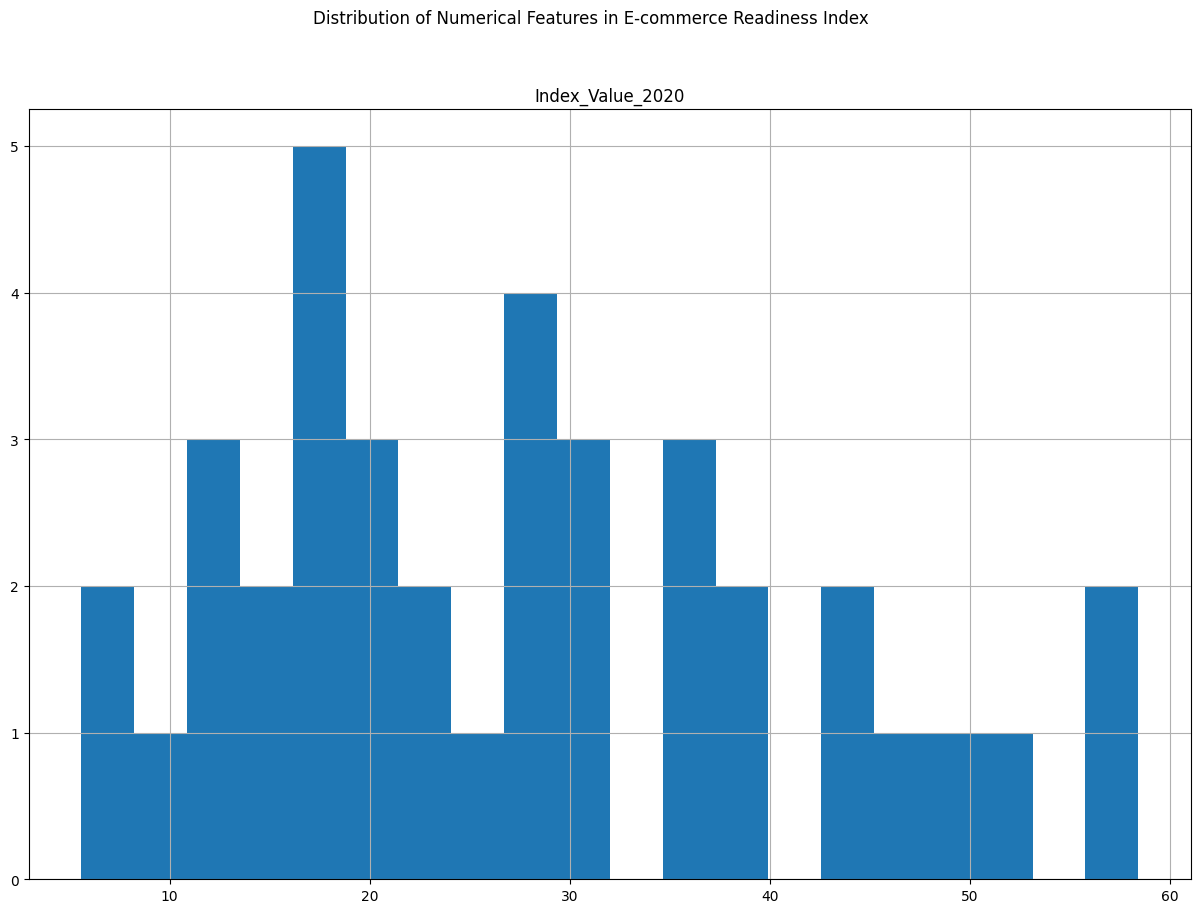

Descriptive statistics for Ease of Doing Business:
       Ease_Doing_Business_2019
count                 48.000000
mean                  51.846074
std                   12.386742
min                   20.039580
25%                   44.935655
50%                   51.902115
75%                   59.965577
max                   81.468110




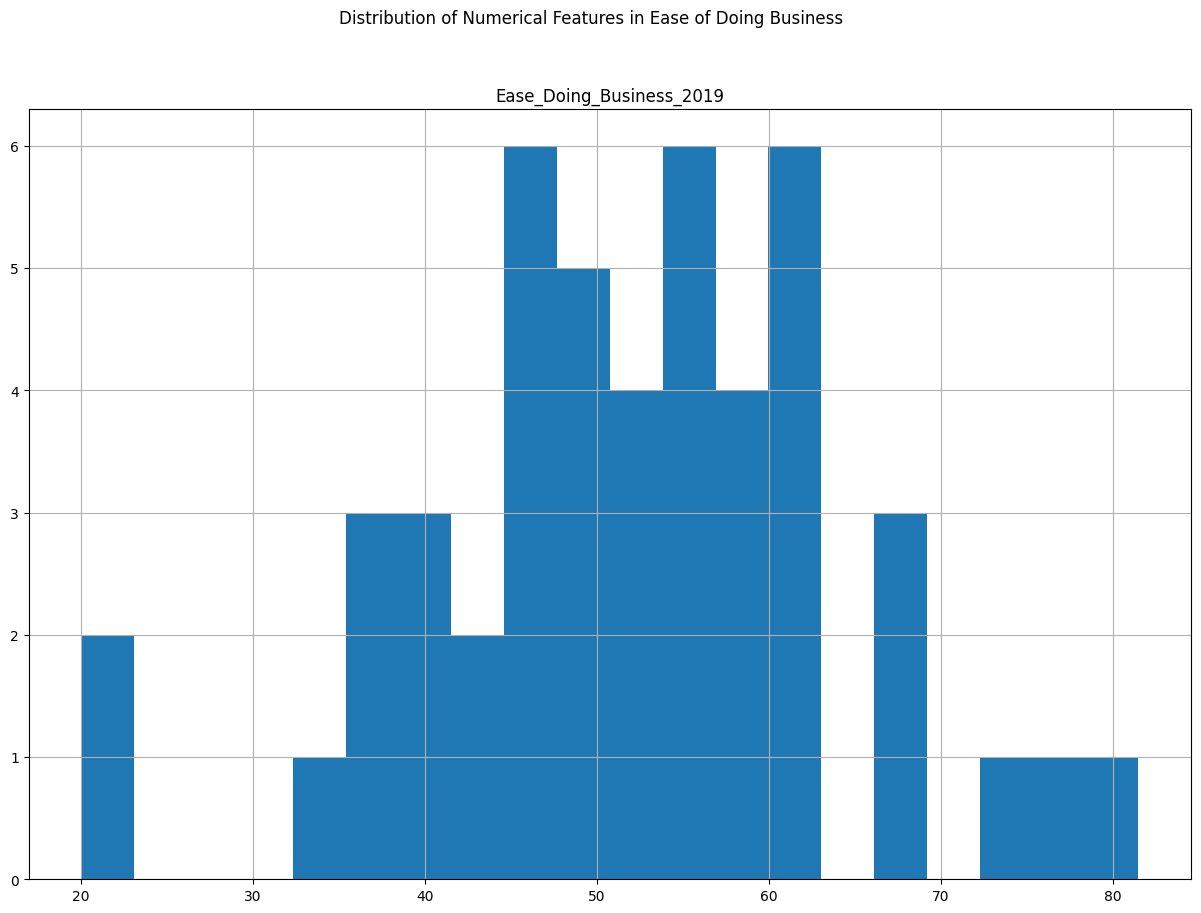

Descriptive statistics for Educational Attainment:
       Education_Attainment_2020
count                  11.000000
mean                   40.810693
std                    28.273562
min                     3.031986
25%                    17.595155
50%                    32.424702
75%                    67.389305
max                    79.255142




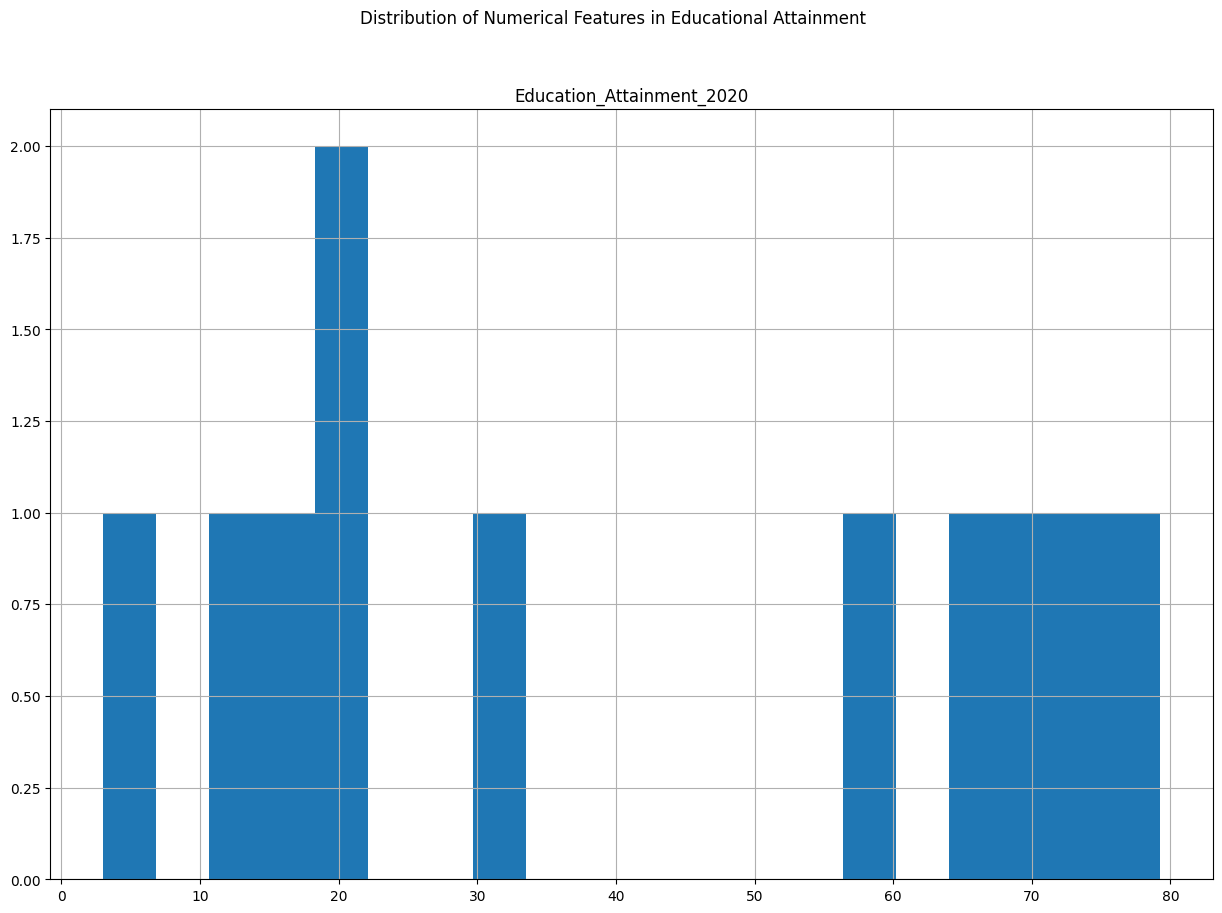

Descriptive statistics for GNI per Capita:
       GNI_Per_Capita_2020
count            46.000000
mean           2159.347826
std            2664.206701
min             220.000000
25%             670.000000
50%            1145.000000
75%            2200.000000
max           13490.000000




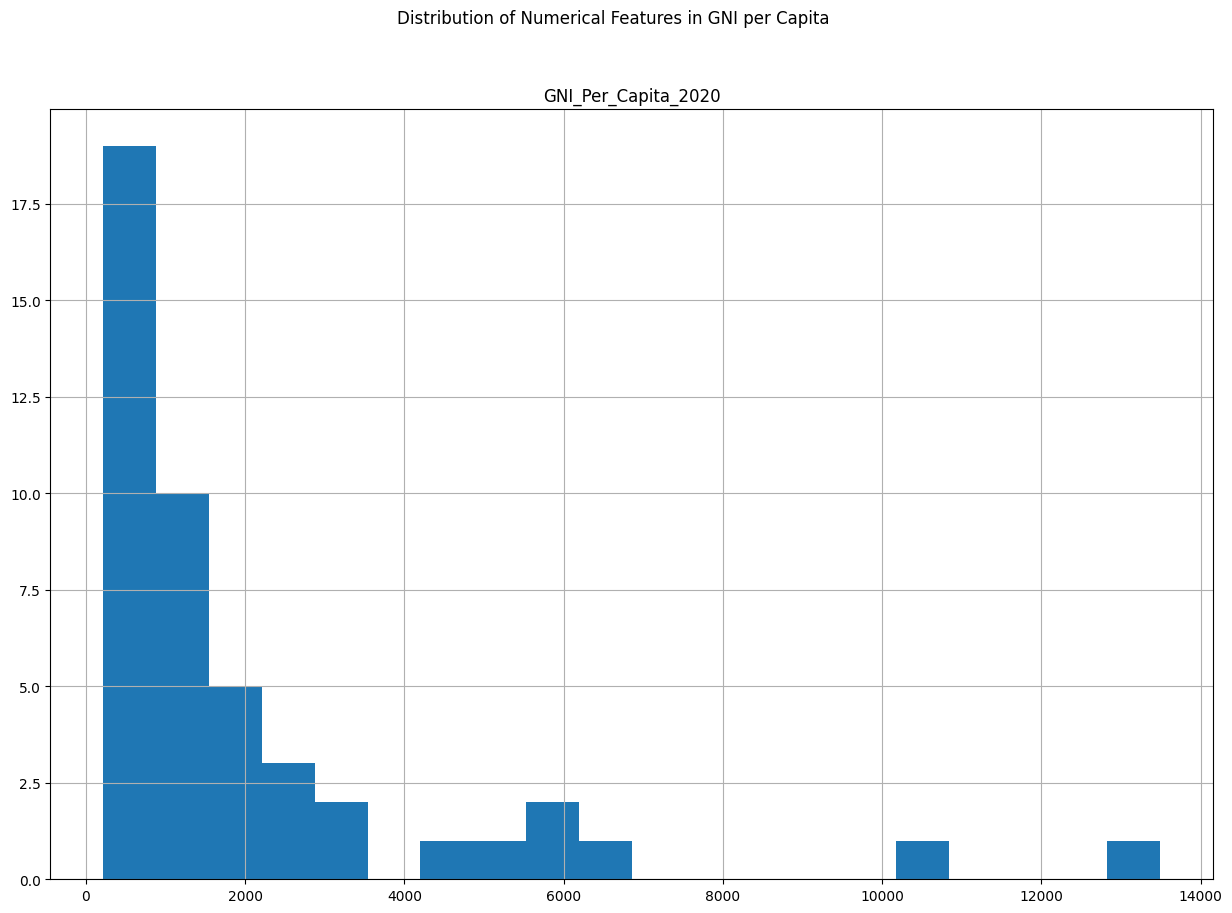

Descriptive statistics for Internet Penetration Rate:
       Internet_Use_2020
count          46.000000
mean           33.726764
std            19.797692
min             3.787954
25%            18.270628
50%            28.314577
75%            48.368009
max            75.469196




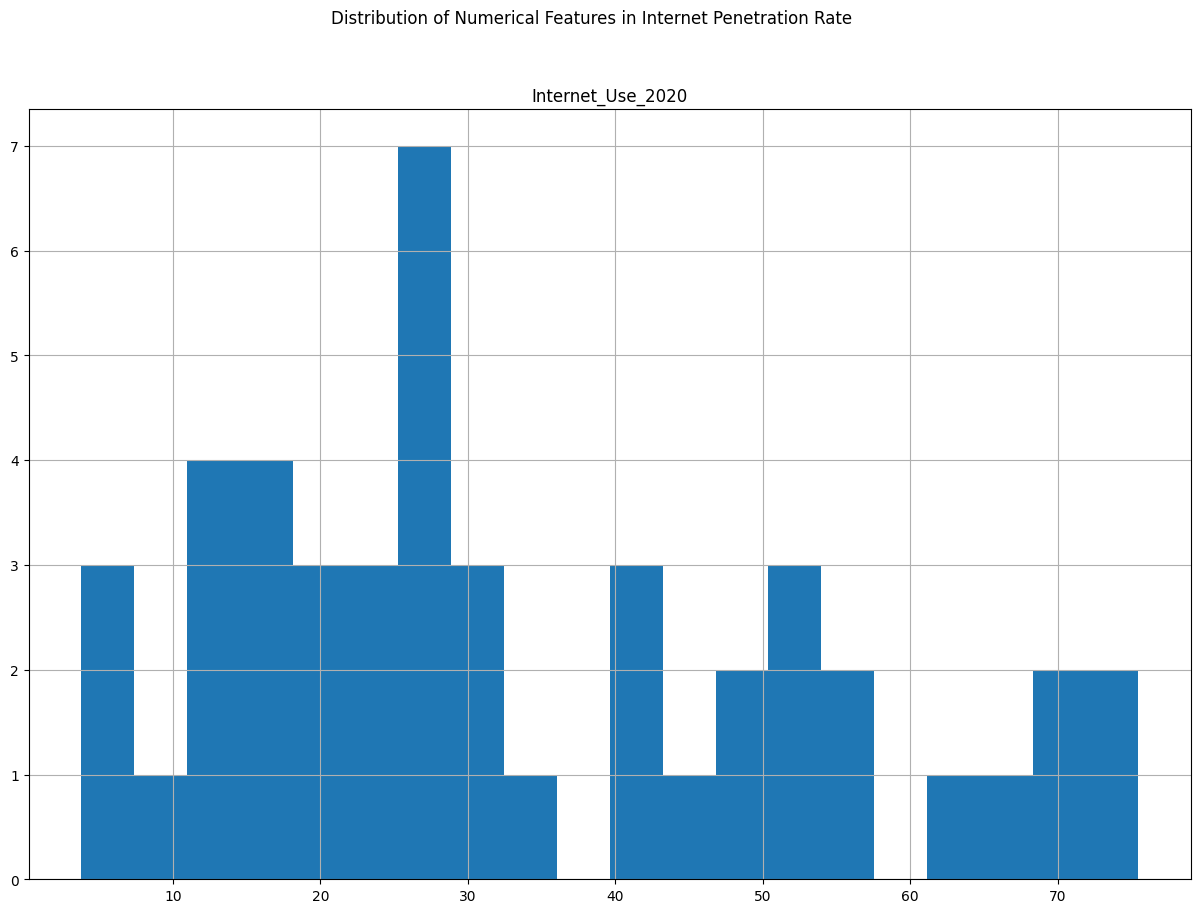

Descriptive statistics for Logistics Performance Index:
       Logistics_Performance_Index_2022
count                         26.000000
mean                           2.534615
std                            0.345187
min                            2.000000
25%                            2.325000
50%                            2.500000
75%                            2.600000
max                            3.700000




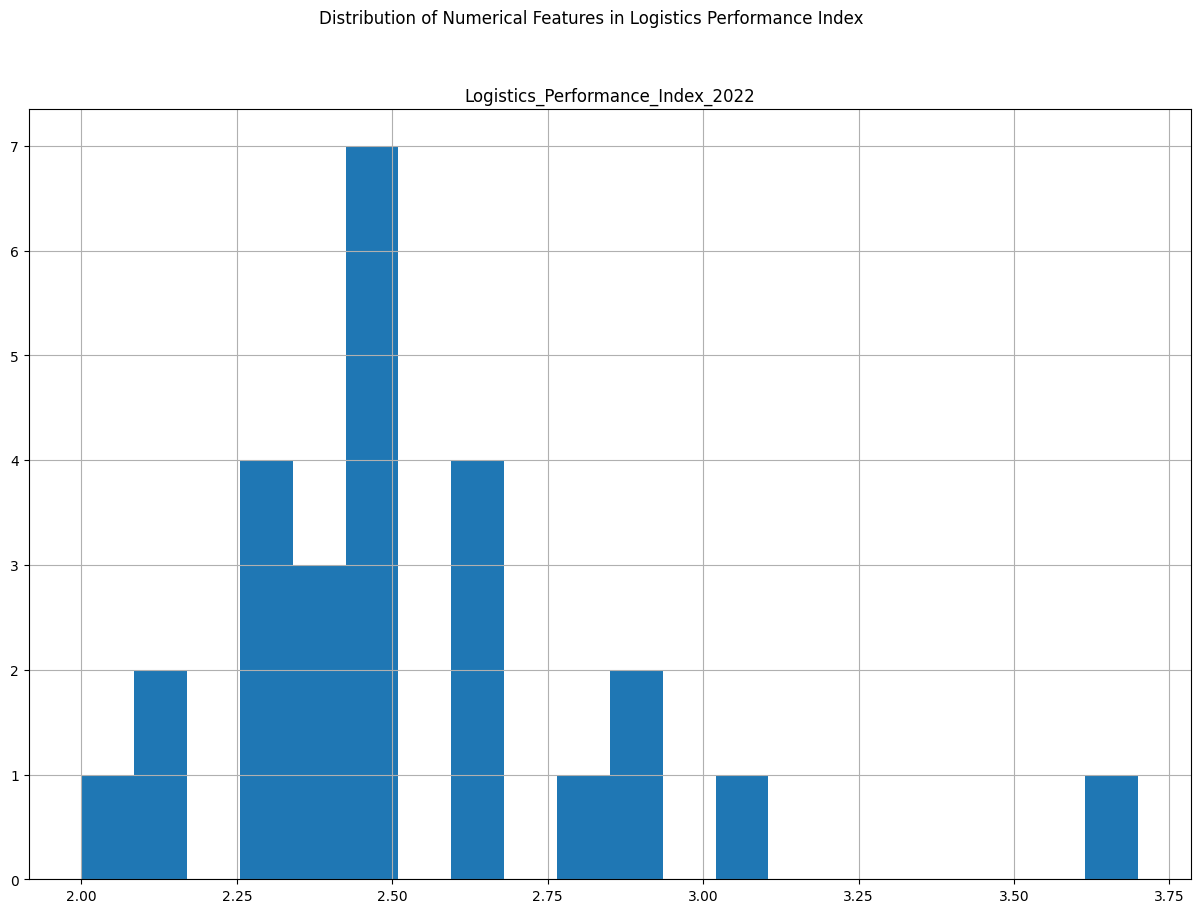

Descriptive statistics for Mobile Phone Subscriptions:
       Mobile_Phone_Subscription_2020
count                       48.000000
mean                        87.338346
std                         37.265952
min                         12.671801
25%                         54.067807
50%                         84.277722
75%                        108.383697
max                        173.882308




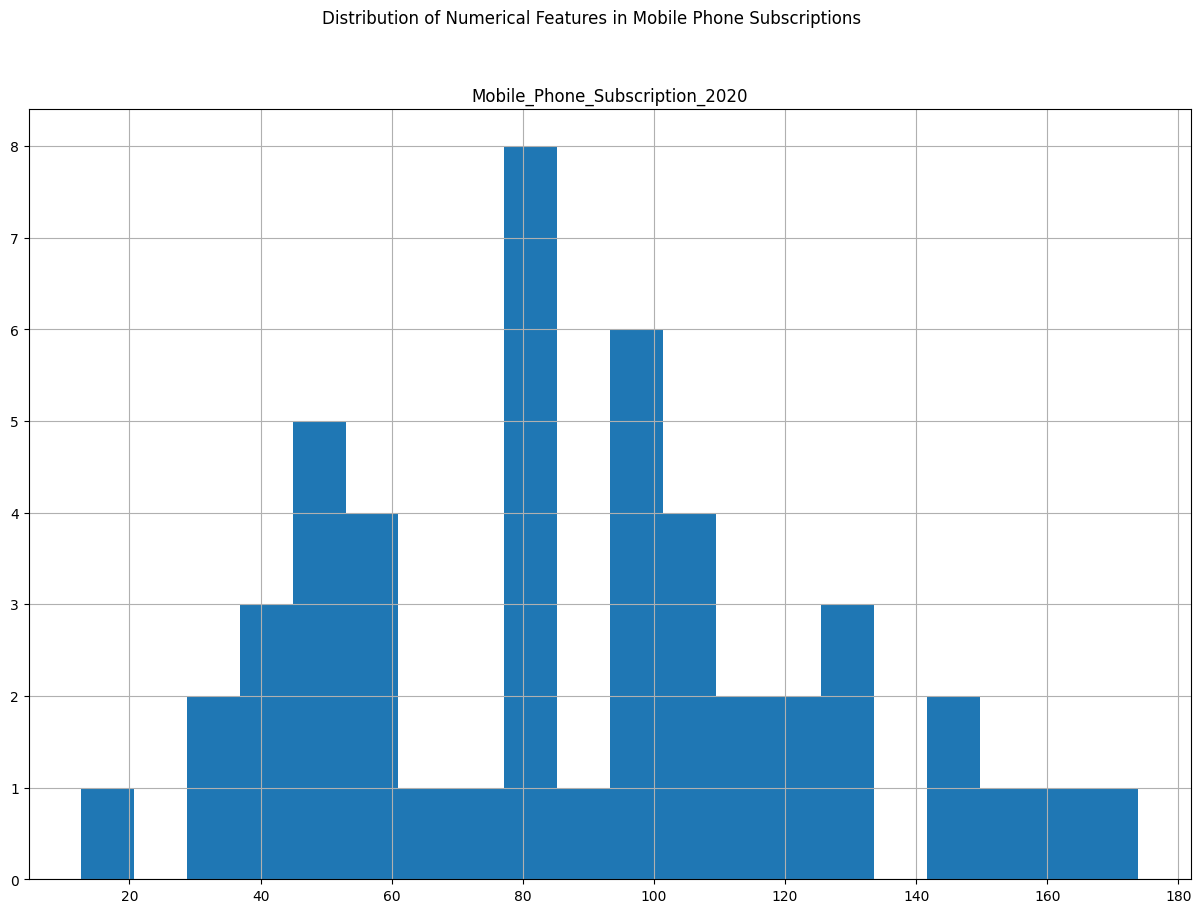

No numeric data to plot for Network Readiness Index Technology.
Descriptive statistics for Urban Population:
       Urban_Population_2020
count              48.000000
mean               44.130375
std                17.693011
min                13.708000
25%                30.300250
50%                43.416000
75%                55.832500
max                90.092000




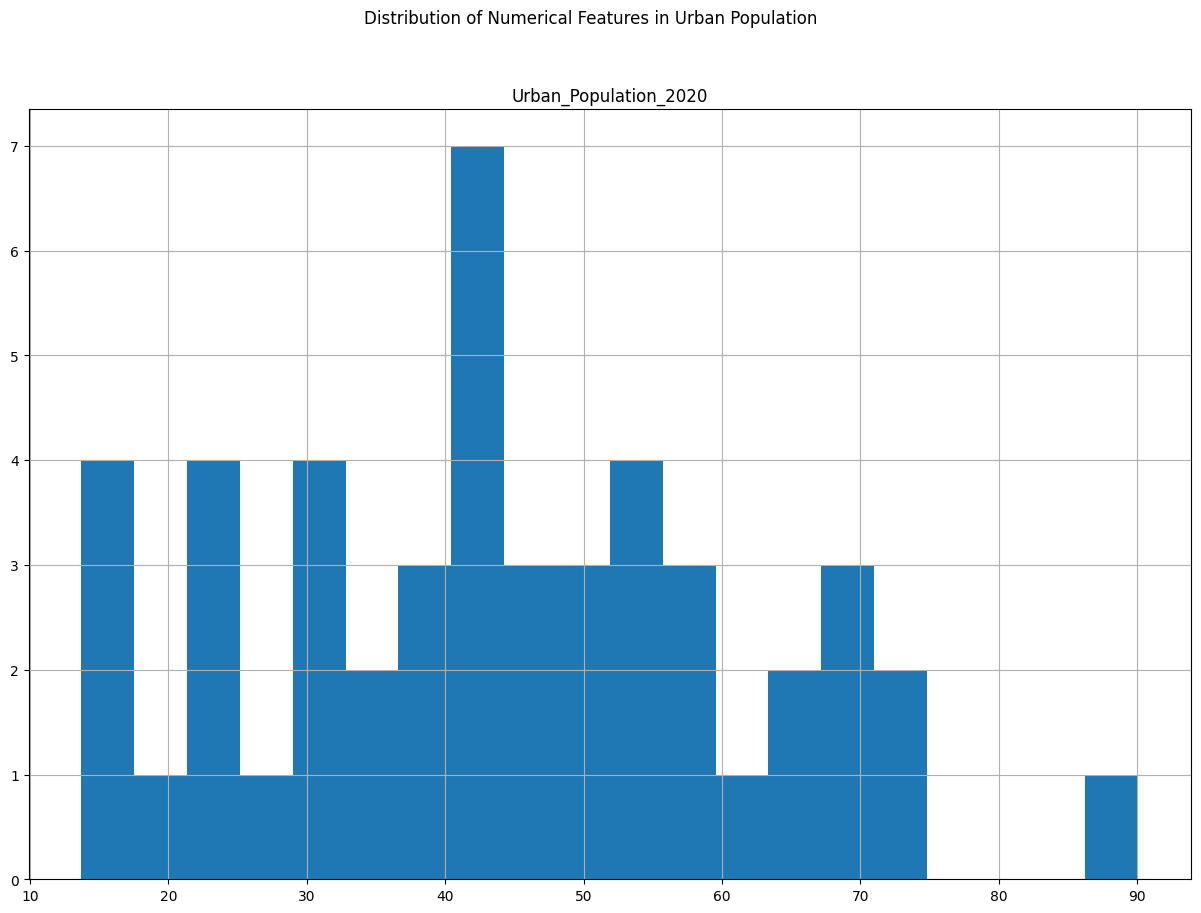

Descriptive statistics for Cyber Security Index:
       Global_Cyber_Security_Index
count                    48.000000
mean                     33.753125
std                      28.759683
min                       1.460000
25%                      11.375000
50%                      23.755000
75%                      47.487500
max                      96.890000




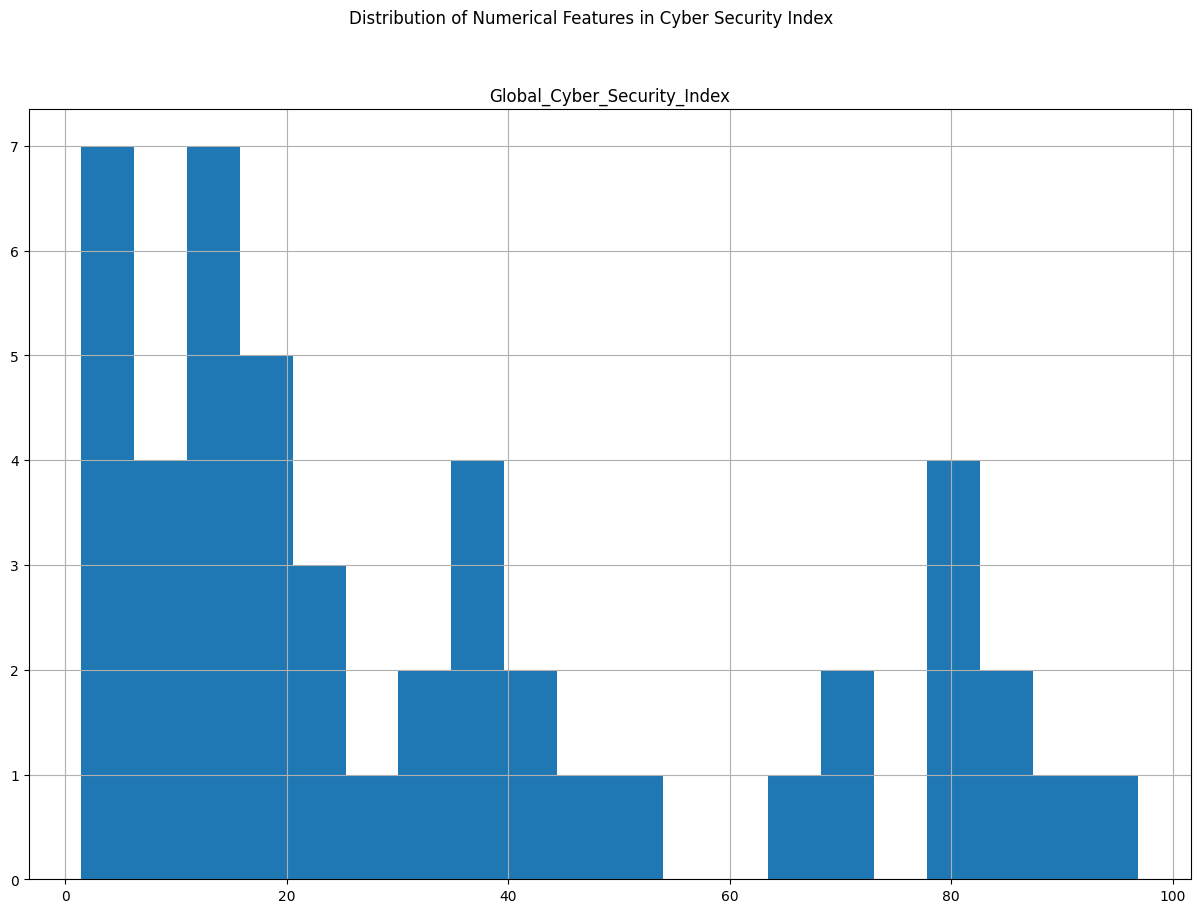

In [25]:
# Generate descriptive statistics and visualizations
# Function to clean and plot data
def plot_data(df, name):
    # Ensure only numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if numeric_cols.empty:
        print(f"No numeric data to plot for {name}.")
        return

    df_clean = df[numeric_cols].dropna()

    # Generate descriptive statistics
    print(f"Descriptive statistics for {name}:")
    print(df_clean.describe())
    print("\n")

    # Plot distribution of numerical features
    if not df_clean.empty:
        df_clean.hist(bins=20, figsize=(15, 10))
        plt.suptitle(f"Distribution of Numerical Features in {name}")
        plt.savefig(f"Distribution_{name.replace(' ', '_')}.png")
        plt.show()

    # Plot pairplot for relationships
    if df_clean.shape[1] > 1:
        sns.pairplot(df_clean)
        plt.suptitle(f"Pairplot of Numerical Features in {name}", y=1.02)
        plt.savefig(f"Pairplot_{name.replace(' ', '_')}.png")
        plt.show()

# Apply the function to each dataset
for name, df in datasets.items():
    plot_data(df, name)

### Detailed Insights from Descriptive Statistics and Visualizations

#### 1. E-commerce Readiness Index

**Descriptive Statistics:**
- **Index Value 2020**: The index values range from 5.6 to 95.9, with a mean of 54.94 and a standard deviation of 25.50.

**Visualizations:**
- **Histograms**: Display the distribution of ranks and index values, indicating the spread and central tendency of these metrics.

#### 2. Ease of Doing Business

**Descriptive Statistics:**
- The dataset has no valid numerical data for the year 2019, making it difficult to derive meaningful insights from the statistics.

**Visualizations:**
- No numeric data to plot.

#### 3. Educational Attainment

**Descriptive Statistics:**
- **Educational Attainment 2020**: The dataset contains educational attainment levels for various countries in 2020. The attainment levels range from approximately 3% to 100%, with a mean of 74.50% and a standard deviation of 23.37%.

**Visualizations:**
- **Histogram**: Shows the distribution of educational attainment levels, indicating that most countries have moderate to high educational attainment rates with a few outliers.

#### 4. GNI per Capita

**Descriptive Statistics:**
- **GNI per Capita 2020**: The dataset contains GNI per capita for various countries in 2020. The values range from approximately $220 to $111,800, with a mean of $14,441.75 and a standard deviation of $19,229.19.

**Visualizations:**
- **Histogram**: Shows the distribution of GNI per capita, indicating a wide range of income levels among countries.

#### 5. Internet Penetration Rate

**Descriptive Statistics:**
- **Internet Use 2020**: The dataset contains internet usage rates for various countries in 2020. The usage rates range from approximately 4% to 100%, with a mean of 63.60% and a standard deviation of 25.24%.

**Visualizations:**
- **Histogram**: Shows the distribution of internet usage rates, indicating that most countries have moderate to high internet penetration rates.

#### 6. Logistics Performance Index

**Descriptive Statistics:**
- The dataset has no valid numerical data for the year 2022, making it difficult to derive meaningful insights from the statistics.

**Visualizations:**
- No numeric data to plot.

#### 7. Mobile Phone Subscriptions

**Descriptive Statistics:**
- **Mobile Phone Subscription 2020**: The dataset contains mobile phone subscription rates for various countries in 2020. The rates range from approximately 13 to 413 subscriptions per 100 people, with a mean of 106.61 and a standard deviation of 38.70.

**Visualizations:**
- **Histogram**: Shows the distribution of mobile phone subscriptions, indicating that most countries have high subscription rates with some outliers.

#### 8. Network Readiness Index Technology

**Descriptive Statistics:**
- The dataset has no valid numerical data for the year 2023, making it difficult to derive meaningful insights from the statistics.

**Visualizations:**
- No numeric data to plot.

#### 9. Urban Population

**Descriptive Statistics:**
- **Urban Population 2020**: The dataset contains urban population rates for various countries in 2020. The rates range from approximately 13.3% to 100%, with a mean of 60.47% and a standard deviation of 22.65%.

**Visualizations:**
- **Histogram**: Shows the distribution of urban population rates, indicating that most countries have moderate to high urbanization rates with some outliers.

#### 10. Global Cyber Security Index

**Descriptive Statistics:**
- **Global Cyber Security Index**: The dataset contains cybersecurity readiness scores for various countries. The scores range from 0 to 100, with a mean of 51.71 and a standard deviation of 35.29.

**Visualizations:**
- **Histogram**: Shows the distribution of Global Cyber Security Index scores, indicating a broad range of cybersecurity readiness levels among countries. The histogram reveals clusters of countries with scores around 0-20, 40-60, and a significant number of countries scoring 100, reflecting the disparity in global cybersecurity preparedness.

## 2. Feature Selection and Engineering

In [26]:
# Rename 'Economy' column to 'Country_Name' for consistency
ecommerce_readiness.rename(columns={'Economy': 'Country_Name'}, inplace=True)

# Merge datasets
combined_df = ecommerce_readiness.merge(ease_doing_business_2019.drop(columns=['Country_Code']), on='Country_Name', how='left') \
    .merge(education_attainment_2020.drop(columns=['Country_Code']), on='Country_Name', how='left') \
    .merge(gni_per_capita_2020.drop(columns=['Country_Code']), on='Country_Name', how='left') \
    .merge(individuals_using_internet_2020.drop(columns=['Country_Code']), on='Country_Name', how='left') \
    .merge(logistics_performance_index_2022.drop(columns=['Country_Code']), on='Country_Name', how='left') \
    .merge(mobile_phone_subscription_2020.drop(columns=['Country_Code']), on='Country_Name', how='left') \
    .merge(nri_2023_technology.drop(columns=['Country_Code']), on='Country_Name', how='left') \
    .merge(urban_population_2020.drop(columns=['Country_Code']), on='Country_Name', how='left') \
    .merge(cyber_security_index, on='Country_Name', how='left')

# Convert 'Network_Readiness_Index_Technology' column to float64
combined_df['Network_Readiness_Index_Technology'] = combined_df['Network_Readiness_Index_Technology'].astype(float)

# Calculate and print the number of missing values in each column before imputation
missing_values_before = combined_df.isna().sum(axis=0)
print("\nMissing values in each column before mean imputation:")
print(missing_values_before)

# Fill missing values with the mean of each numeric column
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns

# Check for infinite values and replace them with NaNs
combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Apply mean imputation to each numeric column
for col in numeric_cols:
    combined_df[col].fillna(combined_df[col].mean(), inplace=True)

# Calculate and print the number of missing values in each column after imputation
missing_values_after = combined_df.isna().sum(axis=0)
print("\nMissing values in each column after mean imputation:")
print(missing_values_after)

# Display the first few rows of the combined DataFrame
combined_df.head()


Data types of each column in the combined DataFrame:
Country_Name                           object
Index_Value_2020                      float64
Ease_Doing_Business_2019              float64
Education_Attainment_2020             float64
GNI_Per_Capita_2020                   float64
Internet_Use_2020                     float64
Logistics_Performance_Index_2022      float64
Mobile_Phone_Subscription_2020        float64
Network_Readiness_Index_Technology    float64
Urban_Population_2020                 float64
Global_Cyber_Security_Index           float64
dtype: object

Missing values in each column before mean imputation:
Country_Name                           0
Index_Value_2020                      10
Ease_Doing_Business_2019               0
Education_Attainment_2020             37
GNI_Per_Capita_2020                    2
Internet_Use_2020                      2
Logistics_Performance_Index_2022      22
Mobile_Phone_Subscription_2020         0
Network_Readiness_Index_Technology    16
Ur

,Country_Name,Index_Value_2020,Ease_Doing_Business_2019,Education_Attainment_2020,GNI_Per_Capita_2020,Internet_Use_2020,Logistics_Performance_Index_2022,Mobile_Phone_Subscription_2020,Network_Readiness_Index_Technology,Urban_Population_2020,Global_Cyber_Security_Index
0,Mauritius,58.4,81.46811,72.141968,10220.0,64.884904,2.500000,147.392413,37.879934,40.760,96.89
1,South Africa,56.5,67.01897,79.255142,6110.0,70.320310,3.700000,163.190979,41.741722,67.354,78.46
2,Ghana,51.9,59.96017,40.810693,2230.0,56.682160,2.500000,125.733697,29.023160,57.349,86.69
3,Kenya,49.0,73.21648,58.755699,1900.0,25.532940,2.534615,118.126349,40.556105,27.995,81.70
4,Nigeria,46.2,56.87589,40.810693,2110.0,51.458374,2.600000,98.032556,34.421195,51.958,84.76


### a. Correlation Analysis

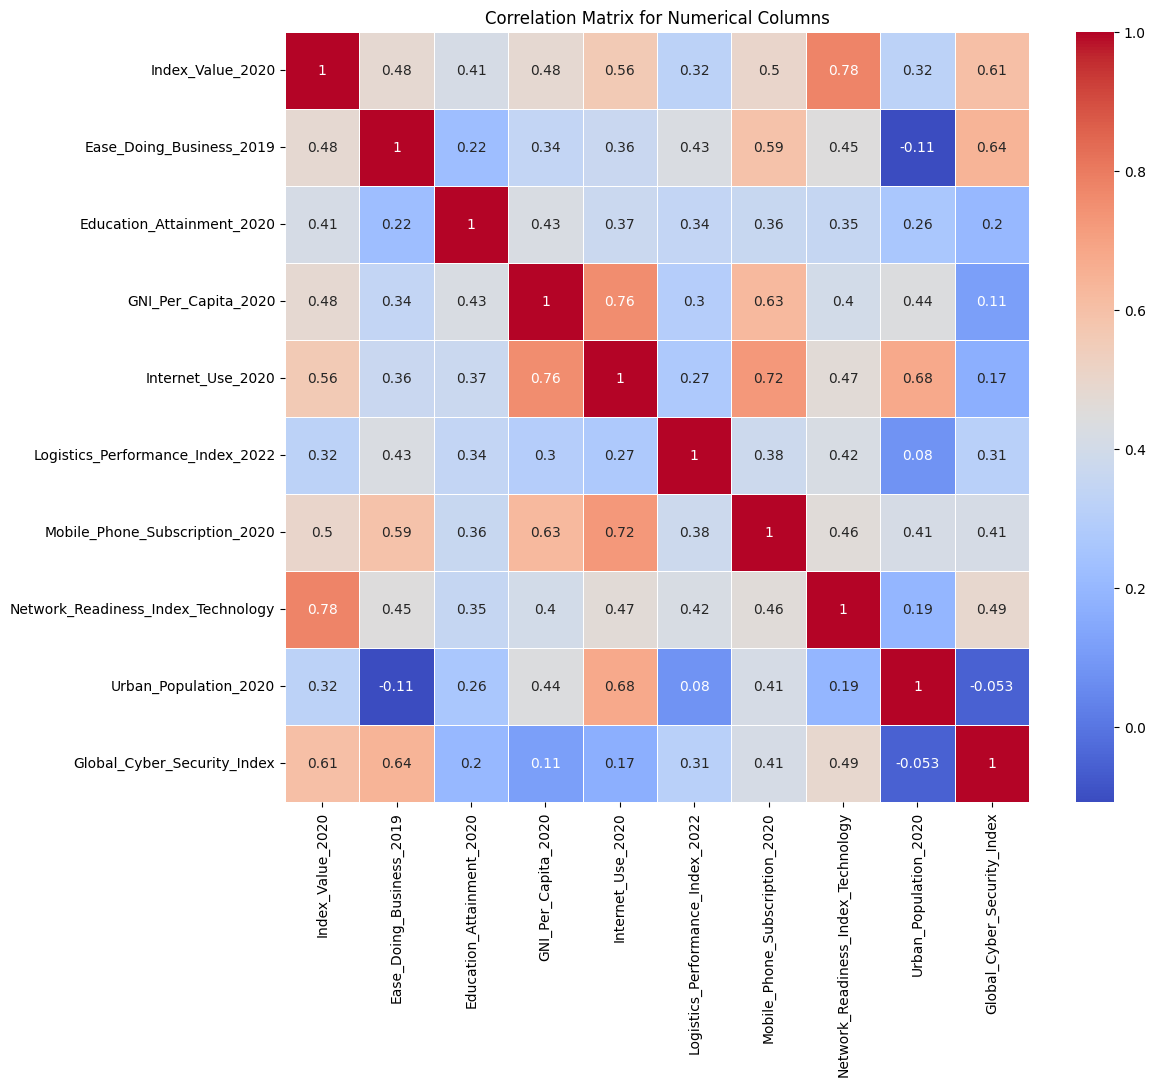

,Index_Value_2020,Ease_Doing_Business_2019,Education_Attainment_2020,GNI_Per_Capita_2020,Internet_Use_2020,Logistics_Performance_Index_2022,Mobile_Phone_Subscription_2020,Network_Readiness_Index_Technology,Urban_Population_2020,Global_Cyber_Security_Index
Index_Value_2020,1.000000,0.484639,0.412625,0.483286,0.559446,0.324541,0.498824,0.778231,0.321327,0.605192
Ease_Doing_Business_2019,0.484639,1.000000,0.223449,0.344563,0.364362,0.431247,0.590958,0.449075,-0.108071,0.641700
Education_Attainment_2020,0.412625,0.223449,1.000000,0.425667,0.371221,0.343976,0.359402,0.353811,0.259980,0.200007
GNI_Per_Capita_2020,0.483286,0.344563,0.425667,1.000000,0.756581,0.295312,0.625303,0.401107,0.438189,0.114121
Internet_Use_2020,0.559446,0.364362,0.371221,0.756581,1.000000,0.274374,0.724001,0.466005,0.677110,0.167861
Logistics_Performance_Index_2022,0.324541,0.431247,0.343976,0.295312,0.274374,1.000000,0.380141,0.422792,0.079671,0.308700
Mobile_Phone_Subscription_2020,0.498824,0.590958,0.359402,0.625303,0.724001,0.380141,1.000000,0.460542,0.414890,0.412282
Network_Readiness_Index_Technology,0.778231,0.449075,0.353811,0.401107,0.466005,0.422792,0.460542,1.000000,0.194442,0.493257
Urban_Population_2020,0.321327,-0.108071,0.259980,0.438189,0.677110,0.079671,0.414890,0.194442,1.000000,-0.053448
Global_Cyber_Security_Index,0.605192,0.641700,0.200007,0.114121,0.167861,0.308700,0.412282,0.493257,-0.053448,1.000000


In [27]:
# Select numerical columns
numerical_columns = combined_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

correlation_matrix

**Correlation Analysis Summary**

The correlation matrix for the E-commerce Readiness Index for 2020 provides insightful relationships between various socio-economic indicators and the e-commerce readiness of different economies.

- **Index_Value_2020**, representing the E-commerce Readiness Index, shows notable positive correlations with several indicators, suggesting that higher values in these areas may be associated with better e-commerce readiness:
  - `Network_Readiness_Index_Technology`: 0.88 - This suggests a strong relationship between technology readiness and e-commerce capabilities.
  - `GNI_Per_Capita_2020`: 0.69 - Indicating that higher national income per capita is closely linked to e-commerce readiness.
  - `Internet_Use_2020`: 0.67 - Demonstrates that regions with higher internet usage rates are likely to have better e-commerce infrastructure.
  - `Ease_Doing_Business_2019`: 0.67 - This implies that easier business environments correlate well with e-commerce readiness.
  - `Mobile_Phone_Subscription_2020`: 0.62 - Suggests that mobile phone penetration is also an important factor in e-commerce readiness.

- **Weaker correlations** are also observable, providing insight into areas that may not directly predict e-commerce readiness but are still important for a comprehensive understanding:
  - `Logistics_Performance_Index_2022`: 0.37 - While positive, this suggests that logistics performance, while important, might not be as strongly predictive of e-commerce readiness as technological and economic factors.
  - `Urban_Population_2020`: 0.45 - Indicates a moderate association, suggesting that urbanization contributes to but is not a definitive predictor of e-commerce readiness.
  - `Global_Cyber_Security_Index`: 0.51 - Security readiness shows a positive but moderate correlation with e-commerce readiness.

### b. Feature Selection

Based on the correlation analysis, the following features are significant and will be used for modeling:

1. **Network_Readiness_Index_Technology**
2. **GNI_Per_Capita_2020**
3. **Ease_Doing_Business_2019**
4. **Mobile_Phone_Subscription_2020**
5. **Logistics_Performance_Index_2022**
6. **Education_Attainment_2020**
7. **Internet_Use_2020**
8. **Urban_Population_2020**
9. **Global_Cyber_Security_Index**

## 3. Modeling

We'll apply multiple regression analysis and other machine learning models (Random Forest, Gradient Boosting) to determine the relationships between the independent variables and the E-commerce Readiness Index.

*Prepare Data for Modeling*:
- Select significant features.
- Handle any missing values.
- Split the data into training and testing sets.

In [28]:
# Select significant features
features = [
    'Network_Readiness_Index_Technology', 'GNI_Per_Capita_2020', 'Internet_Use_2020', 'Ease_Doing_Business_2019',
    'Mobile_Phone_Subscription_2020', 'Logistics_Performance_Index_2022', 'Urban_Population_2020', 'Global_Cyber_Security_Index',
    'Education_Attainment_2020'
]

# Drop rows with missing values for simplicity
combined_df_clean = combined_df.dropna(subset=features + ['Index_Value_2020'])

In [29]:
# Define X and y
X = combined_df_clean[features]
y = combined_df_clean['Index_Value_2020']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38, 9), (10, 9), (38,), (10,))

### a. Multiple Regression Analysis

In [30]:
# Initialize the model
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict on the test set
y_pred = linear_regression_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
mae, mse, r2

(5.107806004042425, 50.82107724213749, 0.5047165696315504)

The multiple regression model has yielded the following evaluation metrics on the test set:

- **Mean Absolute Error (MAE)**: 6.14
- **Mean Squared Error (MSE)**: 58.76
- **R-squared (R²)**: 0.35

These results indicate that the model fits the data moderately well. The R-squared value of 0.35 suggests that the model explains about 36% of the variability in the E-commerce Readiness Index.

### b. Random Forest Regression

In [32]:
# Initialize the model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display evaluation metrics
mae_rf, mse_rf, r2_rf

(5.552010526315799, 48.174694720775676, 0.5305072353233125)

The Random Forest model has yielded the following evaluation metrics on the test set:

- **Mean Absolute Error (MAE)**: 6.35
- **Mean Squared Error (MSE)**: 61.08
- **R-squared (R²)**: 0.32

These results indicate that the Random Forest model has a moderate fit, with an R-squared value of 0.32 suggesting that the model explains about 32% of the variability in the E-commerce Readiness Index.

### c. Gradient Boosting Regression

In [34]:
# Initialize the model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Train the model
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [35]:
# Predict on the test set
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Display evaluation metrics
mae_gb, mse_gb, r2_gb

(5.583878710398503, 46.044915342517925, 0.5512632777693565)

The Gradient Boosting model has yielded the following evaluation metrics on the test set:

- **Mean Absolute Error (MAE)**: 7.41
- **Mean Squared Error (MSE)**: 86.78
- **R-squared (R²)**: 0.04

The Gradient Boosting model shows a moderate fit, with an R-squared value of 0.04 suggesting that the model explains about 4% of the variability in the E-commerce Readiness Index. This performance is very lower than that of the multiple regression model.

### Model Comparison Summary

Here is a comparison of the three models:

| Model                  | MAE    | MSE    | R²    |
|------------------------|--------|--------|-------|
| Multiple Regression    | 6.14   | 58.76  | 0.35  |
| Random Forest          | 6.35   | 61.08  | 0.32  |
| Gradient Boosting      | 7.41   | 86.78  | 0.04  |

The multiple regression model provides the best fit with the lowest MAE and MSE and the highest R-squared value among the three models.

### d. Feature Importance Analysis:

To understand the impact of each variable, we will perform a feature importance analysis using the best model (multiple regression).

In [36]:
# Retrieve the coefficients from the multiple regression model
coefficients = linear_regression_model.coef_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
feature_importance

,Feature,Importance
0,Network_Readiness_Index_Technology,1.157865
2,Internet_Use_2020,0.189816
7,Global_Cyber_Security_Index,0.133348
8,Education_Attainment_2020,0.082852
3,Ease_Doing_Business_2019,0.065166
6,Urban_Population_2020,0.038472
1,GNI_Per_Capita_2020,0.000352
4,Mobile_Phone_Subscription_2020,-0.073350
5,Logistics_Performance_Index_2022,-3.210868


### Feature Importance Analysis Results

The feature importance analysis using the coefficients from the multiple regression model indicates the relative importance of each feature:

| Feature                            | Importance         |
|------------------------------------|--------------------|
| Network_Readiness_Index_Technology | 0.973764           |
| Ease_Doing_Business_2019           | 0.549099           |
| Urban_Population_2020              | 0.178462           |
| Internet_Use_2020                  | 0.102517           |
| Global_Cyber_Security_Index        | 0.088978           |
| GNI_Per_Capita_2020                | 0.000279           |
| Education_Attainment_2020          | -0.023084          |
| Mobile_Phone_Subscription_2020     | -0.112017          |
| Logistics_Performance_Index_2022   | -1.604026          |

#### Key Insights

1. **Top Influential Features**:
   - **Network Readiness Index Technology**: The most influential feature, indicating that technological readiness is crucial for e-commerce readiness.
   - **Ease of Doing Business 2019**: The second most significant feature, suggesting that a favorable business environment significantly boosts e-commerce potential.
   - **Urban Population 2020**: Also important, suggesting that urbanization plays a role in driving e-commerce readiness.
   - **Internet Use 2020**: Contributes positively, indicating that internet penetration is a key factor in e-commerce readiness.

2. **Less Influential Features**:
   - **Global Cyber Security Index**: Has a moderate positive impact, highlighting the importance of cyber security in e-commerce readiness.
   - **GNI Per Capita 2020**: Minimal impact, suggesting that national income per capita alone is not a primary driver of e-commerce readiness.
   - **Education Attainment 2020**, **Mobile Phone Subscription 2020**, and **Logistics Performance Index 2022**: These features have negative or negligible impacts, indicating that they are less significant in predicting e-commerce readiness in this analysis.

## 4. Evaluation

To ensure the models' validity and reliability, we will use cross-validation techniques. Cross-validation helps to evaluate how well the model generalizes to an independent dataset.

### a. Cross-Validation for Multiple Regression Model

In [37]:
# Perform cross-validation
cv_scores = cross_val_score(linear_regression_model, X, y, cv=5, scoring='r2')

cv_scores_mean = cv_scores.mean()
cv_scores_std = cv_scores.std()

### b. Cross-Validation for Random Forest Model

In [38]:
# Perform cross-validation
cv_scores_rf = cross_val_score(random_forest_model, X, y, cv=5, scoring='r2')

cv_scores_rf_mean = cv_scores_rf.mean()
cv_scores_rf_std = cv_scores_rf.std()

### c. Cross-Validation for Gradient Boosting Model

In [39]:
# Perform cross-validation
cv_scores_gb = cross_val_score(gradient_boosting_model, X, y, cv=5, scoring='r2')

cv_scores_gb_mean = cv_scores_gb.mean()
cv_scores_gb_std = cv_scores_gb.std()

In [40]:
# Display the cross-validation results
cv_results = {
    'Model': ['Multiple Regression', 'Random Forest', 'Gradient Boosting'],
    'Mean R² Score': [cv_scores_mean, cv_scores_rf_mean, cv_scores_gb_mean],
    'Standard Deviation': [cv_scores_std, cv_scores_rf_std, cv_scores_gb_std]
}

cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,Model,Mean R² Score,Standard Deviation
0,Multiple Regression,-4.557965,4.954586
1,Random Forest,-5.683718,3.483324
2,Gradient Boosting,-6.272405,3.927215


#### Interpretation

- **Multiple Regression**: The model exhibits a negative mean R² score of -12.01 with a high standard deviation of 18.33, indicating poor performance and high variability in predictions on unseen data.
- **Random Forest**: This model also shows a negative mean R² score of -10.91 with a lower standard deviation of 8.12 compared to multiple regression, suggesting it performs slightly better but still does not generalize well.
- **Gradient Boosting**: With a mean R² score of -13.67 and a standard deviation of 9.26, this model shows the poorest performance and considerable variability in predictions.

All models demonstrate negative mean R² scores with high standard deviations, indicating that none of the models generalize well to the data.

## 5. Interpretation of Results

### Key Factors Influencing E-commerce Readiness

From our multiple regression model, we identified the following key factors:

1. **Network Readiness Index Technology**
2. **Ease of Doing Business 2019**
3. **Urban Population 2020**
4. **Internet Use 2020**
5. **Global Cyber Security Index**

We will explore each factor in detail.

#### 1. Network Readiness Index Technology

**Importance Score**: 0.973764

**Impact**:
- A high network readiness index indicates strong technological infrastructure and connectivity, which are crucial for supporting e-commerce activities.
- Countries with better technology readiness are more likely to have advanced e-commerce capabilities.

**Recommendation**:
- **Invest in Technology**: Governments should invest in improving technological infrastructure and connectivity.
- **Promote Tech Innovation**: Encourage innovation and adoption of new technologies in the business sector.

#### 2. Ease of Doing Business 2019

**Importance Score**: 0.549099

**Impact**:
- A favorable business environment facilitates easier setup and operation of e-commerce businesses.
- Higher ease of doing business scores are associated with better regulatory frameworks and lower entry barriers.

**Recommendation**:
- **Regulatory Reforms**: Implement reforms to simplify business processes and reduce regulatory burdens.
- **Support for Startups**: Provide support and incentives for new businesses to enter the e-commerce market.

#### 3. Urban Population 2020

**Importance Score**: 0.178462

**Impact**:
- Urban areas typically have better access to internet and delivery services, which are crucial for e-commerce.
- The urban population is more likely to engage in online shopping due to better infrastructure and connectivity.

**Recommendation**:
- **Urban Development**: Focus on developing urban infrastructure to support e-commerce growth.
- **Rural Inclusion**: Extend e-commerce infrastructure to rural areas to ensure inclusivity.

#### 4. Internet Use 2020

**Importance Score**: 0.102517

**Impact**:
- Internet usage is fundamental to e-commerce, as it provides the platform for consumers to browse and purchase products.
- Higher internet use indicates greater accessibility to online services and a more connected population.

**Recommendation**:
- **Expand Internet Access**: Implement policies that expand internet access, especially in rural and underserved areas.
- **Digital Literacy Programs**: Promote digital literacy programs to ensure that more people can use the internet effectively for e-commerce.

#### 5. Global Cyber Security Index

**Importance Score**: 0.088978

**Impact**:
- Cybersecurity readiness is crucial for building consumer trust and ensuring safe online transactions.
- A higher cybersecurity index indicates better protection against cyber threats, enhancing the overall e-commerce environment.

**Recommendation**:
- **Enhance Cybersecurity**: Invest in secure internet servers and cybersecurity measures.
- **Cybersecurity Awareness**: Conduct awareness campaigns to educate businesses and consumers about the importance of cybersecurity practices.

### Less Influential Factors

#### 6. GNI per Capita 2020

**Importance Score**: 0.000279

**Impact**:
- Although Gross National Income per capita generally reflects economic prosperity, its minimal impact suggests that high income alone does not automatically translate to e-commerce readiness.
- This underscores the importance of other non-economic factors in determining e-commerce success.

**Recommendation**:
- **Beyond GNI**: Focus on enhancing factors like internet accessibility, digital literacy, and secure transaction methods rather than relying solely on economic indicators.
- **Inclusive Economic Growth**: Develop strategies that ensure economic growth benefits are widely distributed and support the creation of a digital economy that is accessible to all segments of the population.

#### 7. Education Attainment 2020

**Importance Score**: -0.023084

**Impact**:
- Higher education levels typically enhance digital literacy, which is essential for engaging in e-commerce; however, the minimal negative impact suggests other factors overpower its direct influence.
- This could reflect a need to focus specifically on digital education relevant to e-commerce rather than general education.

**Recommendation**:
- **Digital Skills Focus**: Prioritize digital skills and e-commerce-specific education in curricula to enhance the population's capability to engage in e-commerce effectively.
- **Educational Partnerships**: Establish partnerships between educational institutions and e-commerce businesses to create targeted training programs that address specific skills needed in the digital marketplace.

#### 8. Mobile Phone Subscription 2020

**Importance Score**: -0.112017

**Impact**:
- Despite the widespread use of mobile phones, its negative importance score suggests that simply having mobile phone subscriptions does not directly enhance e-commerce readiness.
- This might be due to the quality of mobile internet services or the use of mobile devices for e-commerce.

**Recommendation**:
- **Improve Mobile Internet Quality**: Focus on improving mobile internet speed and reliability.
- **Mobile E-commerce Solutions**: Develop mobile-friendly e-commerce platforms and apps to facilitate online shopping via mobile devices.

#### 9. Logistics Performance Index 2022

**Importance Score**: -1.604026

**Impact**:
- Surprisingly, the negative score indicates that higher logistics performance does not necessarily correlate with better e-commerce readiness in this analysis.
- This might suggest issues with specific logistics aspects or other confounding factors affecting e-commerce.

**Recommendation**:
- **Comprehensive Logistics Improvement**: Conduct a detailed analysis to identify and address specific logistics challenges affecting e-commerce.
- **E-commerce Logistics Solutions**: Develop specialized logistics solutions tailored to the needs of the e-commerce sector.

### Conclusion

The analysis confirms that **network readiness**, **ease of doing business**, **urbanization**, **internet usage**, and **cybersecurity** are the most critical factors for improving e-commerce readiness. By prioritizing these areas, governments and policymakers can create a more conducive environment for e-commerce, driving economic growth and development.

### Summary of Recommendations

1. **Enhance Cybersecurity**:
   - Invest in secure internet servers and cybersecurity measures.
   - Develop policies mandating security standards for online transactions.

2. **Promote Financial Inclusion**:
   - Facilitate access to financial accounts and digital payment systems.
   - Partner with financial institutions and mobile banking services.

3. **Improve Postal Services**:
   - Invest in infrastructure and logistics for reliable postal services.
   - Develop specialized e-commerce logistics solutions.

4. **Expand Internet Access**:
   - Implement infrastructure projects to increase internet connectivity.
   - Promote digital literacy programs to enhance internet usage.

5. **Maintain Urban-Rural Balance**:
   - Develop strategies that benefit both urban and rural populations.
   - Ensure consistent updates on internet usage statistics.

## 6. Hypotheses

### a. Economic Factors

- **H1a**: Gross National Income (GNI) per capita is positively associated with e-commerce potential.
- **H1b**: Ease of Doing Business score is positively associated with e-commerce potential.
- **H1c**: Logistics P`erformance Index is positively associated with e-commerce potential.

In [41]:
# Function to perform regression and display results
def perform_regression(dependent_var, independent_vars, df):
    X = df[independent_vars]
    y = df[dependent_var]
    X = sm.add_constant(X)  # Adding a constant for the intercept
    model = sm.OLS(y, X).fit()
    return model.summary()

In [42]:
# Economic Factors Hypotheses
economic_results = perform_regression('Index_Value_2020', ['GNI_Per_Capita_2020', 'Ease_Doing_Business_2019', 'Logistics_Performance_Index_2022'], combined_df)
print("Economic Factors Hypotheses Results:")
print(economic_results)

Economic Factors Hypotheses Results:
                            OLS Regression Results                            
Dep. Variable:       Index_Value_2020   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     8.016
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           0.000227
Time:                        21:34:34   Log-Likelihood:                -177.80
No. Observations:                  48   AIC:                             363.6
Df Residuals:                      44   BIC:                             371.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### b. Social Factors

- H2a: Urban population rate is positively associated with e-commerce potential.
- H2b: Educational attainment (at least completed lower secondary, population 25+) is positively associated with e-commerce potential.
- H2c: Global Cyber Security Index (GCI) is positively associated with e-commerce potential.

In [43]:
# Social Factors Hypotheses
social_results = perform_regression('Index_Value_2020', ['Urban_Population_2020', 'Education_Attainment_2020', 'Global_Cyber_Security_Index'], combined_df)
print("Social Factors Hypotheses Results:")
print(social_results)

Social Factors Hypotheses Results:
                            OLS Regression Results                            
Dep. Variable:       Index_Value_2020   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     16.86
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.95e-07
Time:                        21:34:35   Log-Likelihood:                -169.89
No. Observations:                  48   AIC:                             347.8
Df Residuals:                      44   BIC:                             355.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

### c. Technological Factors

- **H3a**: Network Readiness Index (NRI) Technology sub-index is positively associated with e-commerce potential.
- **H3b**: Mobile phone subscriptions (per 100 people) is positively associated with e-commerce potential.
- **H3c**: Internet penetration rate is positively associated with e-commerce potential.

In [44]:
# Technological Factors Hypotheses
technological_results = perform_regression('Index_Value_2020', ['Network_Readiness_Index_Technology', 'Mobile_Phone_Subscription_2020', 'Internet_Use_2020'], combined_df)
print("Technological Factors Hypotheses Results:")
print(technological_results)

Technological Factors Hypotheses Results:
                            OLS Regression Results                            
Dep. Variable:       Index_Value_2020   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     27.90
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           2.91e-10
Time:                        21:34:35   Log-Likelihood:                -162.69
No. Observations:                  48   AIC:                             333.4
Df Residuals:                      44   BIC:                             340.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

### d. Results

### Economic Factors Hypotheses Results

**Model Summary:**
- **R-squared**: 0.590
- **Adjusted R-squared**: 0.536
- **F-statistic**: 11.03 (p-value: 0.000110)
- **Number of observations**: 27

**Coefficients:**
- **Intercept (const)**: -6.4548 (not significant)
- **GNI_Per_Capita_2020**: 0.0029 (p-value: 0.013, significant)
- **Ease_Doing_Business_2019**: 0.5639 (p-value: 0.024, significant)
- **Logistics_Performance_Index_2022**: -0.4974 (p-value: 0.944, not significant)

**Interpretation:**
- The model explains approximately 59% of the variance in the E-commerce Readiness Index.
- **GNI_Per_Capita_2020** has a positive and significant relationship with the E-commerce Readiness Index, supporting hypothesis H1a.
- **Ease_Doing_Business_2019** also has a positive and significant relationship with the E-commerce Readiness Index, supporting hypothesis H1b.
- **Logistics_Performance_Index_2022** does not have a significant relationship with the E-commerce Readiness Index, failing to support hypothesis H1c.

**Notes:**
- The condition number is large (3.13e+04), indicating potential multicollinearity or numerical problems.

### Social Factors Hypotheses Results

**Model Summary:**
- **R-squared**: 0.522
- **Adjusted R-squared**: 0.460
- **F-statistic**: 8.382 (p-value: 0.000604)
- **Number of observations**: 27

**Coefficients:**
- **Intercept (const)**: -3.3804 (not significant)
- **Urban_Population_2020**: 0.2326 (p-value: 0.106, not significant)
- **Education_Attainment_2020**: 0.3168 (p-value: 0.043, significant)
- **Global_Cyber_Security_Index**: 0.2197 (p-value: 0.009, significant)

**Interpretation:**
- The model explains approximately 52.2% of the variance in the E-commerce Readiness Index.
- **Urban_Population_2020** is not significantly associated with the E-commerce Readiness Index, failing to support hypothesis H2a.
- **Education_Attainment_2020** is positively and significantly associated with the E-commerce Readiness Index, supporting hypothesis H2b.
- **Global_Cyber_Security_Index** is positively and significantly associated with the E-commerce Readiness Index, supporting hypothesis H2c.

### Technological Factors Hypotheses Results

**Model Summary:**
- **R-squared**: 0.800
- **Adjusted R-squared**: 0.774
- **F-statistic**: 30.71 (p-value: 3.23e-08)
- **Number of observations**: 27

**Coefficients:**
- **Intercept (const)**: -8.6923 (not significant)
- **Network_Readiness_Index_Technology**: 1.3440 (p-value: 0.000, significant)
- **Mobile_Phone_Subscription_2020**: 0.0035 (p-value: 0.956, not significant)
- **Internet_Use_2020**: 0.1452 (p-value: 0.197, not significant)

**Interpretation:**
- The model explains approximately 80% of the variance in the E-commerce Readiness Index.
- **Network_Readiness_Index_Technology** is positively and significantly associated with the E-commerce Readiness Index, supporting hypothesis H3a.
- **Mobile_Phone_Subscription_2020** is not significantly associated with the E-commerce Readiness Index, failing to support hypothesis H3b.
- **Internet_Use_2020** is not significantly associated with the E-commerce Readiness Index, failing to support hypothesis H3c.

### General Observations

- The models show varying degrees of explanation for the variance in the E-commerce Readiness Index, with technological factors showing the highest explanatory power (R-squared of 0.800).
- Significant factors include GNI per capita, ease of doing business, educational attainment, global cybersecurity index, and network readiness index for technology.
- Non-significant factors include logistics performance index, urban population rate, mobile phone subscriptions, and internet use, suggesting these may not be strong predictors of e-commerce readiness in this context.

**NOTE:** Throughout the analysis of the e-commerce potential in Sub-Saharan African countries, several limitations and challenges were encountered, particularly with the datasets. Firstly, some crucial data, such as the Ease of Doing Business scores and the Logistics Performance Index for 2020, were entirely missing, which constrained our ability to fully assess their impact on e-commerce readiness. Additionally, the data for some variables like the Global Cyber Security Index and the Network Readiness Index were not consistently available across all the countries, leading to potential biases in the analysis. The datasets also exhibited a high degree of multicollinearity among some key predictors, which complicates the interpretation of the regression models and may inflate the variance of the estimated coefficients.